In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="eCYnMVb9qUfCnC2yNaWq")
project = rf.workspace("detection-aq67m").project("sign-language-recognition-dex5d")
version = project.version(1)
dataset = version.download("folder")


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.5/84.5 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 14.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 64.6 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.11.0.86
    Uninstalling opencv-python-headless-4.11.0.86:
      Successfully uninstalled opencv-python-headless-4.11.0.86
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Sign-Language-Recognition-1 in folder:: 100%|██████████| 81030/81030 [00:15<00:00, 5181.47it/s]


In [ ]:
pip install split-folders

In [ ]:
import splitfolders
dr = '/content/Sign-Language-Recognition-1/Sing_Language_Data'
splitfolders.ratio(dr,"splitSing_Language_dataset" ,ratio=(0.7,0.3))

Copying files: 81000 files [00:25, 3133.59 files/s]


In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
import os

# Set dataset path
dataset_path = "/content/Sign-Language-Recognition-1/Sing_Language_Data"  # Change this if needed

# Define parameters
img_size = (64, 64)
batch_size = 32
num_classes = 27  # A-Z + DEL + SPACE + BLANK

datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

val_generator = datagen.flow_from_directory(
    dataset_path,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

# Build the improved model
model = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', kernel_regularizer=keras.regularizers.l2(0.001), input_shape=(64, 64, 3)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(64, (3, 3), activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Conv2D(128, (3, 3), activation='relu', kernel_regularizer=keras.regularizers.l2(0.001)),
    layers.BatchNormalization(),
    layers.MaxPooling2D(2, 2),

    layers.Flatten(),
    layers.Dense(512, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(num_classes, activation='softmax')
])

# Compile the model
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001), loss='categorical_crossentropy', metrics=['accuracy'])

# Callbacks for better training
callbacks = [
    EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True),
    ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, verbose=1)
]

# Train the model
epochs = 30
history = model.fit(train_generator, validation_data=val_generator, epochs=epochs, callbacks=callbacks)

##### Save the model

# model.save("sign_language_model.h5")

####### Plot training history

# plt.plot(history.history['accuracy'], label='Train Accuracy')
# plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
# plt.xlabel('Epochs')
# plt.ylabel('Accuracy')
# plt.legend()
# plt.show()


Found 64800 images belonging to 27 classes.
Found 16200 images belonging to 27 classes.
Epoch 1/30
2025/2025 ━━━━━━━━━━━━━━━━━━━━ 314s 151ms/step - accuracy: 0.1525 - loss: 3.1899 - val_accuracy: 0.1860 - val_loss: 2.9953 - learning_rate: 0.0010
Epoch 2/30
2025/2025 ━━━━━━━━━━━━━━━━━━━━ 287s 142ms/step - accuracy: 0.3822 - loss: 2.0070 - val_accuracy: 0.3828 - val_loss: 2.2818 - learning_rate: 0.0010
Epoch 3/30
2025/2025 ━━━━━━━━━━━━━━━━━━━━ 258s 127ms/step - accuracy: 0.5634 - loss: 1.4379 - val_accuracy: 0.5501 - val_loss: 1.5844 - learning_rate: 0.0010
Epoch 4/30
2025/2025 ━━━━━━━━━━━━━━━━━━━━ 286s 141ms/step - accuracy: 0.6676 - loss: 1.1344 - val_accuracy: 0.6001 - val_loss: 1.6308 - learning_rate: 0.0010
Epoch 5/30
2025/2025 ━━━━━━━━━━━━━━━━━━━━ 252s 125ms/step - accuracy: 0.7273 - loss: 0.9831 - val_accuracy: 0.6686 - val_loss: 1.2864 - learning_rate: 0.0010
Epoch 6/30
2025/2025 ━━━━━━━━━━━━━━━━━━━━ 252s 125ms/step - accuracy: 0.7647 - loss: 0.8592 - val_accuracy: 0.6254 - val_l

In [ ]:
# Save the model
model.save("sign_language(M2)_model.h5")

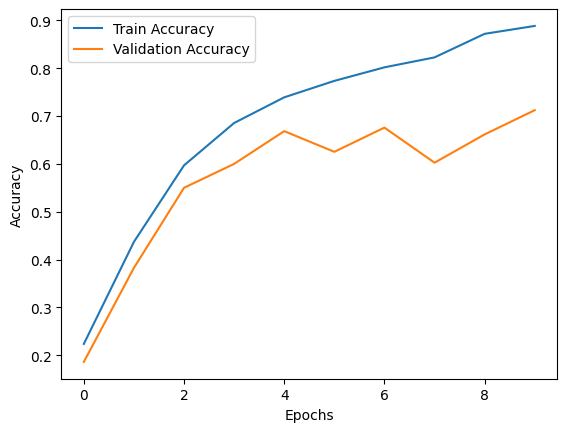

In [ ]:
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 381ms/step


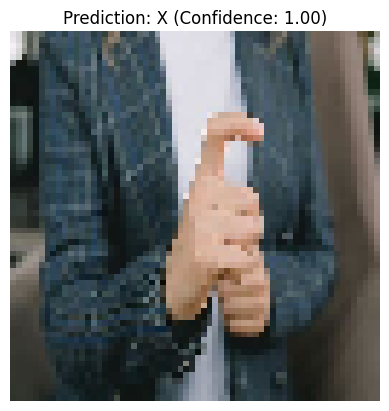

Predicted Class: X, Confidence: 1.00


In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
import matplotlib.pyplot as plt

# Load the trained model
model = tf.keras.models.load_model("/content/sign_language(M3)_model.h5")

# Define image size (should match training size)
img_size = (64, 64)

# Function to predict the class of an input image
def predict_image(image_path, model):
    class_labels = ["A", "B", "C", "D", "E", "F", "G", "H", "I", "J", "K", "L", "M", "N", "O", "P", "Q", "R", "S", "T", "U", "V", "W", "X", "Y", "Z", "DEL", "SPACE", "BLANK"]  # Update based on dataset

    # Load and preprocess the image
    image = load_img(image_path, target_size=img_size)
    image_array = img_to_array(image) / 255.0
    image_array = np.expand_dims(image_array, axis=0)

    # Predict
    prediction = model.predict(image_array)
    predicted_class = class_labels[np.argmax(prediction)]
    confidence = np.max(prediction)

    # Display the image
    plt.imshow(image)
    plt.axis('off')
    plt.title(f"Prediction: {predicted_class} (Confidence: {confidence:.2f})")
    plt.show()

    return predicted_class, confidence

# Test with an input image
test_image_path = "/content/OIP (4).jpg"  # Change to your test image path
predicted_class, confidence = predict_image(test_image_path, model)
print(f"Predicted Class: {predicted_class}, Confidence: {confidence:.2f}")
